In [1]:
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.sparse as sps
from matplotlib import pyplot as plt
import sys
sys.path.append("../../")

In [2]:
from spook import SpookLinSolve, SpookPosL1

In [3]:
Na = 37
Nb = 29
Ns = 10000
Ng = 31

A = np.random.rand(Ns, Na) * 5
Xtrue = np.zeros((Na, Nb))
bb, aa = np.meshgrid(np.arange(Nb), np.arange(Na))
for p1, p2 in zip([1,-1],[1,-1]):
    tmp = 0.1*(Na+Nb) - abs((aa - Na//2) + p1* (bb - Nb//2) - p2* 0.2*(Na+Nb))
    tmp[tmp<0] = 0
    Xtrue += tmp

Text(0, 0.5, '$\\omega$')

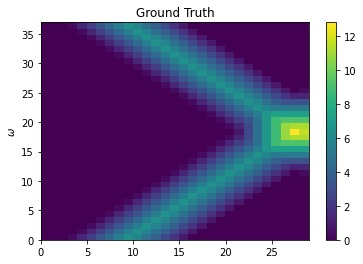

In [4]:
plt.pcolormesh(Xtrue)
plt.colorbar()
plt.title("Ground Truth")
plt.ylabel("$\omega$")

In [17]:
G = np.identity(Ng) - 0.2*np.diag(np.ones(Ng-1),k=-1) - 0.2*np.diag(np.ones(Ng-1),k=1)
G = G[:,:Nb]

B0 = A @ Xtrue
B1 = B0 @ (G.T)
B0 += 1e-3*np.linalg.norm(B0) * np.random.randn(*(B0.shape))
B1 += 1e-3*np.linalg.norm(B1) * np.random.randn(*(B1.shape))

In [18]:
SpookLinSolve.verbose = True
spk0 = SpookLinSolve(B0, A, "raw", lsparse=0.1, lsmooth=(0.,0.0))
spk1 = SpookLinSolve(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.,0.0))

In [19]:
X0 = spk0.getXopt()
X1 = spk1.getXopt()

Solving Lin. Eq.
Solving Lin. Eq.


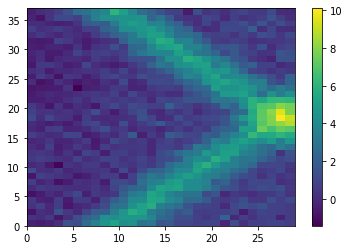

In [20]:
plt.pcolormesh(X0)
plt.colorbar()

Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Solving Lin. Eq.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10

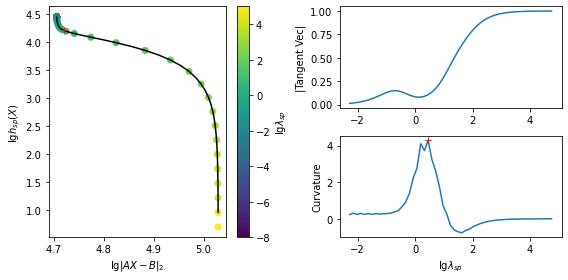

In [24]:
lsp_ = np.logspace(-8,5,51)
res, curv_dat = spk0.scan_lsparse(lsp_,True,True)

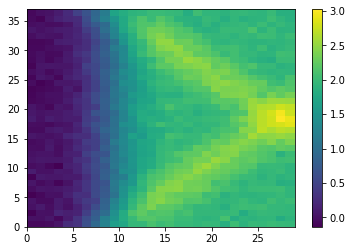

In [25]:
X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.
Updated
Solving Lin. Eq.


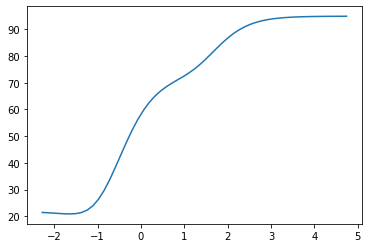

In [26]:
diff = []
for lglsp in curv_dat[:,0]:
    Xo = spk0.getXopt(10**lglsp,None)
    diff.append(np.linalg.norm(Xtrue-Xo,ord='fro'))

plt.plot(curv_dat[:,0], diff)

In [27]:
SpookPosL1.verbose = True
spk0 = SpookPosL1(B0, A, "raw", lsparse=0.1, lsmooth=(0.,0.0))
spk1 = SpookPosL1(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.,0.0))

Setting up the OSQP problem
Setting up the OSQP problem


In [28]:
spk0.set_polish()

Nonnegative constraints and L1 sparsity reg.
Sparsity hyperparam updated.
Solving Quad. Prog.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Nonnegative constraints and L1 sparsity reg.
Sparsity hyperparam updated.
Solving Quad. Prog.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Nonnegative constraints and L1 sparsity reg.
Sparsity hyperparam updated.
Solving Quad. Prog.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Nonnegative constraints and L1 sparsity reg.
Sparsity hyperparam updated.
Solving Quad. Prog.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Nonnegative constraints and L1 sparsity reg.
Sparsity hyperparam updated.
Solving Quad. Prog.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Nonnegative constraints and L1 sparsity reg.
Sparsity hyperparam updated.
Solving Quad. Prog.
Terms in |residue|_2^2: quad=9e+09, lin=-2e+10, const=1e+10
Nonnegative constraints and L1 sparsity reg.
Sparsity hyperparam updated.
So

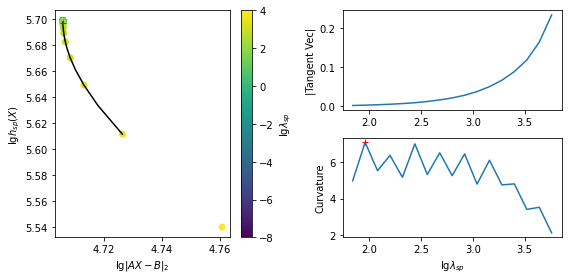

In [30]:
lsp_ = np.logspace(-8,4,51)
res, curv_dat = spk0.scan_lsparse(lsp_, plot=True)

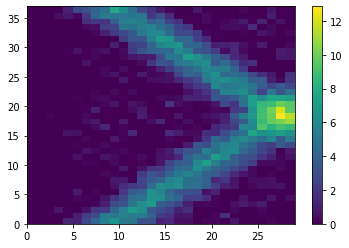

In [31]:
X0 = spk0.getXopt()
plt.pcolormesh(X0)
plt.colorbar()

Sparsity hyperparam updated.
Updated
Nonnegative constraints and L1 sparsity reg.
Solving Quad. Prog.


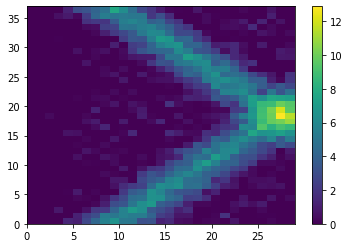

In [33]:
X0 = spk0.getXopt(0,None)
plt.pcolormesh(X0)
plt.colorbar()

In [38]:
AtBG = A.T @ B1 @ G
AtA  = A.T @ A
GtG  = G.T @ G

In [39]:
spk1c = SpookLinSolve(AtBG, AtA, 'contracted', GtG, lsparse=0.1, lsmooth=(0.,0.0))

In [34]:
spk1 = SpookLinSolve(B1, A, "raw", G, lsparse=0.1, lsmooth=(0.,0.0))

In [40]:
X1 = spk1.getXopt()
X1c = spk1c.getXopt()

Solving Lin. Eq.
Solving Lin. Eq.


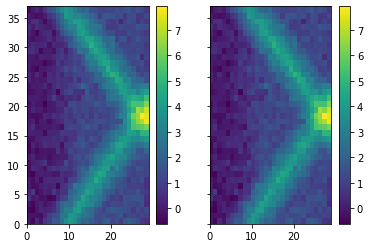

In [45]:
fig, axs = plt.subplots(1,2,sharey=True)
ax1 = axs[0]
im=ax1.pcolormesh(X1)
fig.colorbar(im, ax=ax1)
ax2 = axs[1]
im=ax2.pcolormesh(X1)
fig.colorbar(im, ax=ax2)

In [46]:
np.linalg.norm(X1-X1c,"fro")

0.0

In [48]:
trBtB = (B1**2).sum()

In [51]:
spk1._TrBtB, trBtB

(4403004038.465894, 4403004038.465892)

In [53]:
spk1c.residueL2(trBtB)

Terms in |residue|_2^2: quad=3e+09, lin=-7e+09, const=4e+09


32415.851568235008

In [54]:
spk1.residueL2()

Terms in |residue|_2^2: quad=3e+09, lin=-7e+09, const=4e+09


32415.85156823504